###
# Exploring and Indexing a Stock Price Dataset with pandas

In this mini‑project, I’ll be working with a daily OHLCV (Open, High, Low, Close, Volume) stock price dataset for a single ticker (e.g., AAPL). The goal is to build fluency with pandas Series, DataFrames, and indexing patterns—the core tools used in quantitative research and financial data analysis.

## What this notebook covers
- Loading a real stock price CSV into a pandas DataFrame  
- Inspecting and understanding the structure of time‑series financial data  
- Practicing essential indexing techniques:
  - `.loc` for label‑based selection  
  - `.iloc` for position‑based selection  
  - slicing rows and columns  
  - time‑series indexing with a DatetimeIndex  
- Computing simple and log returns  
- Creating rolling statistics such as moving averages and volatility  
- Subsetting the data for analysis (e.g., last 90 days, high‑volume days)

## Why indexing matters in quant work
Indexing is one of the most important skills in quantitative finance because nearly every research task depends on selecting the right slice of data at the right time. Whether you're:
- isolating a training window for a model,  
- extracting a specific market regime,  
- computing rolling features, or  
- aligning multiple assets for correlation or spread analysis,  

you need precise, reliable control over how you access your data.  
This notebook builds the foundation for that fluency and prepares you for more advanced tasks like factor modeling, backtesting, and strategy development.

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [437]:
#Need to use \\ or / when dealing with file paths
apple_datafile ='C:/Users/jgive/Documents/Python Projects/Mini Projects/Data/aapl_intraday-30min_historical-data-03-17-2025.csv'
df = pd.read_csv(apple_datafile, index_col=0, parse_dates =True)

The input of the parameter index_col=0 eliminates the following three lines of code:

time = df['Time']
time = pd.to_datetime(time)
df = df.set_index('Time')

the following parameter parse_dates =True eliminates the following three lines of code:

df = df.sort_index()
df.index = pd.to_datetime(df.index)
df.index

thus condensing 6 lines of code into one line through two parameter additions. 

It should be noted, Time-based slicing only works when datetimeIndex is a dtype of datatime64[ns]

In [439]:
df.head()

,Open,High,Low,Last,Change,%Chg,Volume
Time,,,,,,,
2025-03-17 10:00:00,213.730,214.000,212.710,213.1000,-0.6200,-0.29%,605624
2025-03-17 09:30:00,213.310,214.970,212.170,213.7200,0.2300,+0.11%,4413023
2025-03-14 15:30:00,212.891,213.900,212.710,213.4900,0.5847,+0.27%,12517747
2025-03-14 15:00:00,212.610,213.411,212.485,212.9053,0.2953,+0.14%,1816782
2025-03-14 14:30:00,211.250,212.700,211.250,212.6100,1.3650,+0.65%,1627184


In [441]:
df.tail()

,Open,High,Low,Last,Change,%Chg,Volume
Time,,,,,,,
2019-01-25 12:30:00,39.2325,39.3050,39.1400,39.2150,-0.0200,-0.05%,5093180
2019-01-25 12:00:00,39.2525,39.2625,39.1475,39.2350,-0.0175,-0.04%,4089371
2019-01-25 11:30:00,39.0949,39.2750,39.0900,39.2525,0.1624,+0.42%,6334452
2019-01-25 11:00:00,39.2900,39.3125,39.0575,39.0901,-0.1999,-0.51%,6810132
2019-01-25 10:30:00,39.1825,39.3125,39.1275,39.2900,0.1050,+0.27%,7884204


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19999 entries, 2025-03-17 10:00:00 to 2019-01-25 10:30:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    19999 non-null  float64
 1   High    19999 non-null  float64
 2   Low     19999 non-null  float64
 3   Last    19999 non-null  float64
 4   Change  19999 non-null  float64
 5   %Chg    19999 non-null  object 
 6   Volume  19999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [445]:
df.describe()

,Open,High,Low,Last,Change,Volume
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,1.999900e+04
mean,141.168273,141.547491,140.781785,141.178532,0.008696,5.468683e+06
std,54.891263,55.007129,54.775773,54.893806,0.713533,5.193360e+06
min,38.582500,38.707500,38.415000,38.580000,-12.230000,4.498860e+05
25%,108.205000,108.785000,107.765000,108.220000,-0.226450,2.360016e+06
50%,147.700000,148.080000,147.230100,147.715000,0.011200,3.835956e+06
75%,177.077500,177.495000,176.595000,177.096950,0.255550,6.750998e+06
max,259.110000,260.100000,259.070000,259.110000,10.935000,1.378686e+08


In [447]:
df['Last'].aggregate(["min", "mean", "std", "max"])

min      38.580000
mean    141.178532
std      54.893806
max     259.110000
Name: Last, dtype: float64

In [665]:
Mean_last = df['Last'].rolling(window=20).mean()
Max_last = df['Last'].rolling(window=20).max()
Min_last =df['Last'].rolling(window=20).min()

df['Mean_last'] = Mean_last
df['Min_last'] = Min_last
df['Max_last'] = Max_last

Mean_open = df['Open'].rolling(window=20).mean()
Max_open = df['Open'].rolling(window=20).max()
Min_open =df['Open'].rolling(window=20).min()

df['Mean_open'] = Mean_open
df['Min_open'] = Min_open
df['Max_open'] = Max_open

In [667]:
df['Mean_last']

Time
2025-03-17 10:00:00          NaN
2025-03-17 09:30:00          NaN
2025-03-14 15:30:00          NaN
2025-03-14 15:00:00          NaN
2025-03-14 14:30:00          NaN
                         ...    
2019-01-25 12:30:00    39.008765
2019-01-25 12:00:00    39.016765
2019-01-25 11:30:00    39.030140
2019-01-25 11:00:00    39.034395
2019-01-25 10:30:00    39.052645
Name: Mean_last, Length: 19999, dtype: float64

In [669]:
df.index

DatetimeIndex(['2025-03-17 10:00:00', '2025-03-17 09:30:00',
               '2025-03-14 15:30:00', '2025-03-14 15:00:00',
               '2025-03-14 14:30:00', '2025-03-14 14:00:00',
               '2025-03-14 13:30:00', '2025-03-14 13:00:00',
               '2025-03-14 12:30:00', '2025-03-14 12:00:00',
               ...
               '2019-01-25 15:00:00', '2019-01-25 14:30:00',
               '2019-01-25 14:00:00', '2019-01-25 13:30:00',
               '2019-01-25 13:00:00', '2019-01-25 12:30:00',
               '2019-01-25 12:00:00', '2019-01-25 11:30:00',
               '2019-01-25 11:00:00', '2019-01-25 10:30:00'],
              dtype='datetime64[ns]', name='Time', length=19999, freq=None)

In [671]:
df.loc['2025-3-12']

,Open,High,Low,Last,Change,%Chg,Volume,Mean,Min,Max,Mean_last,Min_last,Max_last,Mean_open,Min_open,Max_open
Time,,,,,,,,,,,,,,,,
2025-03-12 15:30:00,215.640,217.2800,215.28,216.9800,1.3401,+0.62%,11887653,212.456735,209.680,216.9800,212.456735,209.680,216.9800,212.655115,210.3800,215.95
2025-03-12 15:00:00,216.420,216.4500,215.05,215.6399,-0.7901,-0.37%,2817684,212.627195,209.680,216.9800,212.627195,209.680,216.9800,212.812115,210.3800,216.42
2025-03-12 14:30:00,216.110,217.0899,215.84,216.4300,0.3200,+0.15%,1850234,212.784695,209.680,216.9800,212.784695,209.680,216.9800,213.021115,210.3800,216.42
2025-03-12 14:00:00,216.095,216.9600,215.91,216.1100,0.0000,0.00%,1601304,212.993695,209.680,216.9800,212.993695,209.680,216.9800,213.237740,210.3800,216.42
2025-03-12 13:30:00,218.170,218.2200,216.06,216.1100,-2.0798,-0.95%,1726380,213.212195,209.680,216.9800,213.212195,209.680,216.9800,213.627240,210.6700,218.17
2025-03-12 13:00:00,217.270,218.2300,217.02,218.1898,0.9448,+0.43%,1296702,213.602780,209.680,218.1898,213.602780,209.680,218.1898,213.868740,210.6700,218.17
2025-03-12 12:30:00,218.450,218.6100,216.88,217.2450,-1.1154,-0.51%,2014507,213.840530,209.680,218.1898,213.840530,209.680,218.1898,214.228740,210.6700,218.45
2025-03-12 12:00:00,217.780,218.6100,217.50,218.3604,0.5804,+0.27%,1825980,214.274550,210.630,218.3604,214.274550,210.630,218.3604,214.584240,211.1000,218.45
2025-03-12 11:30:00,216.470,217.8930,216.33,217.7800,1.3350,+0.62%,2142580,214.632050,211.115,218.3604,214.632050,211.115,218.3604,214.812240,211.1000,218.45


In [673]:
df.loc['2025-3-11']

,Open,High,Low,Last,Change,%Chg,Volume,Mean,Min,Max,Mean_last,Min_last,Max_last,Mean_open,Min_open,Max_open
Time,,,,,,,,,,,,,,,,
2025-03-11 15:30:00,221.820,222.0700,220.5800,220.8400,-0.9600,-0.43%,12200400,216.421300,211.9400,221.410,216.421300,211.9400,221.410,216.83600,212.080,221.820
2025-03-11 15:00:00,222.180,223.3100,221.3700,221.8000,-0.3650,-0.16%,2395310,216.914300,212.0757,221.800,216.914300,212.0757,221.800,217.34100,214.045,222.180
2025-03-11 14:30:00,220.550,222.7000,220.0900,222.1650,1.6200,+0.73%,2662646,217.418765,214.0402,222.165,217.418765,214.0402,222.165,217.66625,214.240,222.180
2025-03-11 14:00:00,218.300,220.9800,218.2600,220.5450,2.2550,+1.03%,2467797,217.744005,214.2250,222.165,217.744005,214.2250,222.165,217.86925,214.300,222.180
2025-03-11 13:30:00,217.730,219.5300,217.6800,218.2900,0.5600,+0.26%,2439508,217.947255,214.2900,222.165,217.947255,214.2900,222.165,218.04075,215.275,222.180
2025-03-11 13:00:00,218.970,219.0600,217.4500,217.7300,-1.2700,-0.58%,2864734,218.119255,215.2650,222.165,218.119255,215.2650,222.165,218.22550,215.640,222.180
2025-03-11 12:30:00,218.540,219.8800,218.4400,219.0000,0.4500,+0.21%,2665841,218.306005,215.6399,222.165,218.306005,215.6399,222.165,218.35500,215.640,222.180
2025-03-11 12:00:00,221.100,221.1100,218.5000,218.5500,-2.5898,-1.17%,4224406,218.384505,215.6399,222.165,218.384505,215.6399,222.165,218.62800,216.095,222.180
2025-03-11 11:30:00,220.980,221.7400,220.2600,221.1398,0.1366,+0.06%,2196007,218.659500,216.1000,222.165,218.659500,216.1000,222.165,218.85600,216.095,222.180


In [677]:
# use between_time for specific timestamps in datatime index 
df.between_time("15:30", "15:30")

,Open,High,Low,Last,Change,%Chg,Volume,Mean,Min,Max,Mean_last,Min_last,Max_last,Mean_open,Min_open,Max_open
Time,,,,,,,,,,,,,,,,
2025-03-14 15:30:00,212.8910,213.9000,212.7100,213.4900,0.5847,+0.27%,12517747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-13 15:30:00,210.6700,210.7100,208.4200,209.6800,-0.9500,-0.45%,13462064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-12 15:30:00,215.6400,217.2800,215.2800,216.9800,1.3401,+0.62%,11887653,212.456735,209.6800,216.9800,212.456735,209.6800,216.9800,212.655115,210.3800,215.9500
2025-03-11 15:30:00,221.8200,222.0700,220.5800,220.8400,-0.9600,-0.43%,12200400,216.421300,211.9400,221.4100,216.421300,211.9400,221.4100,216.836000,212.0800,221.8200
2025-03-10 15:30:00,226.9900,228.6600,226.5000,227.4800,0.5050,+0.22%,14370727,220.160790,216.1000,227.4800,220.160790,216.1000,227.4800,220.368250,216.1250,226.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 15:30:00,41.7175,41.7325,41.5450,41.5675,-0.1498,-0.36%,11615708,42.016430,41.5375,42.7675,42.016430,41.5375,42.7675,41.988535,41.5350,42.7725
2019-01-30 15:30:00,41.3954,41.4000,40.9500,41.3100,-0.0850,-0.21%,20351076,41.859620,41.3100,42.2209,41.859620,41.3100,42.2209,41.859030,41.3954,42.2200
2019-01-29 15:30:00,38.5825,38.7075,38.5275,38.6595,0.0795,+0.21%,19121660,41.072420,38.6595,42.2209,41.072420,38.6595,42.2209,41.018715,38.5825,42.2200


In [679]:
df.between_time("9:30","9:30")

,Open,High,Low,Last,Change,%Chg,Volume,Mean,Min,Max,Mean_last,Min_last,Max_last,Mean_open,Min_open,Max_open
Time,,,,,,,,,,,,,,,,
2025-03-17 09:30:00,213.3100,214.9700,212.1700,213.7200,0.2300,+0.11%,4413023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-14 09:30:00,211.2500,213.4300,210.9700,212.4900,2.8100,+1.34%,5817433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-13 09:30:00,215.9500,216.8394,214.3700,215.2650,-1.7150,-0.79%,5284516,212.251735,209.6800,215.2650,212.251735,209.6800,215.2650,212.484865,210.3800,215.9500
2025-03-12 09:30:00,220.1400,221.7500,219.2700,221.4100,0.5700,+0.26%,6502797,215.953800,211.4900,221.4100,215.953800,211.4900,221.4100,216.341690,211.9338,221.3900
2025-03-11 09:30:00,223.8050,225.8399,221.7600,222.0524,-5.4276,-2.39%,7464003,219.649040,216.1000,222.5200,219.649040,216.1000,222.5200,219.941250,216.1250,223.8050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01 09:30:00,41.7400,42.0350,41.6725,41.7775,0.2100,+0.51%,14908860,42.073805,41.5375,42.7675,42.073805,41.5375,42.7675,42.036035,41.5350,42.7725
2019-01-31 09:30:00,41.5275,41.6700,41.1400,41.6351,0.3251,+0.79%,15080820,41.883870,41.5675,42.2209,41.883870,41.5675,42.2209,41.878885,41.5275,42.2200
2019-01-30 09:30:00,40.8125,40.8325,40.1650,40.1946,1.5351,+3.97%,40174852,41.236620,40.1946,42.2209,41.236620,40.1946,42.2209,41.192090,40.1938,42.2200


In [816]:
#Setting the index for daily_close from DateTime to integers
daily_close = df.between_time("15:30", "15:30").copy()
daily_close.index = daily_close.index.to_period('D')
daily_close_1 = daily_close.copy()
daily_close_range = range(len(daily_close_1))
daily_close_1.index =pd.to_numeric(daily_close_1.index)
daily_close_1['Index'] = daily_close_range
daily_close_1 = daily_close_1.set_index('Index')

#Setting the index for daily_open from DateTime to integers
daily_open = df.between_time("9:30", "9:30").copy()
daily_open.index = daily_open.index.to_period('D')
daily_open_1 = daily_open[1:].copy()
daily_open_range = range(len(daily_open_1))
daily_open_1.index =pd.to_numeric(daily_open_1.index)
daily_open_1['Index'] = daily_open_range
daily_open_1 = daily_open_1.set_index('Index')

#Computing daily return and setting index to DateTime for daily
daily_return = daily_close_1['Last'] - daily_open_1['Open']
daily_return = daily_return.dropna()
daily_return.index = daily_close.index.copy()

daily_data = pd.DataFrame()
daily_data['Open'] = daily_open['Open']
daily_data['Close'] = daily_close['Last']
daily_data['Return'] = daily_return
daily_data.iloc[:50]

,Open,Close,Return
Time,,,
2025-03-17,213.310,NaN,NaN
2025-03-14,211.250,213.4900,2.2400
2025-03-13,215.950,209.6800,-6.2700
2025-03-12,220.140,216.9800,-3.1600
2025-03-11,223.805,220.8400,-2.9650
2025-03-10,235.540,227.4800,-8.0600
2025-03-07,235.105,239.0700,3.9650
2025-03-06,234.435,235.3300,0.8950
2025-03-05,235.420,235.7400,0.3200


In [752]:
daily_close_1['Last']

Index
0       213.4900
1       209.6800
2       216.9800
3       220.8400
4       227.4800
          ...   
1526     41.5675
1527     41.3100
1528     38.6595
1529     39.0750
1530     39.4300
Name: Last, Length: 1531, dtype: float64

In [760]:
daily_close['Last']

Time
2025-03-14    213.4900
2025-03-13    209.6800
2025-03-12    216.9800
2025-03-11    220.8400
2025-03-10    227.4800
                ...   
2019-01-31     41.5675
2019-01-30     41.3100
2019-01-29     38.6595
2019-01-28     39.0750
2019-01-25     39.4300
Freq: D, Name: Last, Length: 1531, dtype: float64

In [731]:
daily_open[1:153]

,Open,High,Low,Last,Change,%Chg,Volume,Mean,Min,Max,Mean_last,Min_last,Max_last,Mean_open,Min_open,Max_open
Time,,,,,,,,,,,,,,,,
2025-03-14,211.250,213.4300,210.97,212.4900,2.8100,+1.34%,5817433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-13,215.950,216.8394,214.37,215.2650,-1.7150,-0.79%,5284516,212.251735,209.680,215.2650,212.251735,209.680,215.2650,212.484865,210.3800,215.950
2025-03-12,220.140,221.7500,219.27,221.4100,0.5700,+0.26%,6502797,215.953800,211.490,221.4100,215.953800,211.490,221.4100,216.341690,211.9338,221.390
2025-03-11,223.805,225.8399,221.76,222.0524,-5.4276,-2.39%,7464003,219.649040,216.100,222.5200,219.649040,216.100,222.5200,219.941250,216.1250,223.805
2025-03-10,235.540,236.1600,229.15,230.1900,-8.8800,-3.71%,7801205,224.589205,218.550,230.1900,224.589205,218.550,230.1900,225.226045,218.5400,235.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,216.070,217.6500,215.60,216.9924,0.7524,+0.35%,3835167,218.826140,216.745,221.5850,218.826140,216.745,221.5850,218.623250,216.0700,221.130
2024-08-09,212.100,213.4800,211.97,212.5600,-0.7500,-0.35%,3168743,216.174185,212.560,218.7301,216.174185,212.560,218.7301,215.913660,212.1000,218.730
2024-08-08,213.110,213.2100,208.83,210.7300,0.8700,+0.41%,4567833,213.363135,210.730,215.4350,213.363135,210.730,215.4350,213.189545,210.6700,215.120


In [762]:
daily_open_1['Open']

Index
0       211.2500
1       215.9500
2       220.1400
3       223.8050
4       235.5400
          ...   
1537     41.7400
1538     41.5275
1539     40.8125
1540     39.0625
1541     38.9475
Name: Open, Length: 1542, dtype: float64

In [764]:
daily_return

Time
2025-03-14    2.2400
2025-03-13   -6.2700
2025-03-12   -3.1600
2025-03-11   -2.9650
2025-03-10   -8.0600
               ...  
2019-01-31   -0.8600
2019-01-30   -1.5025
2019-01-29   -3.7680
2019-01-28   -3.7725
2019-01-25   -3.0950
Freq: D, Length: 1531, dtype: float64

In [735]:
len(daily_close)

1531

In [737]:
len(daily_open)

1543

#matplotlib plot
plt.plot(daily_close['Last']) will not work when changing index to period. Thus pandas syntax for plotting is needed. 

<Axes: xlabel='Time'>

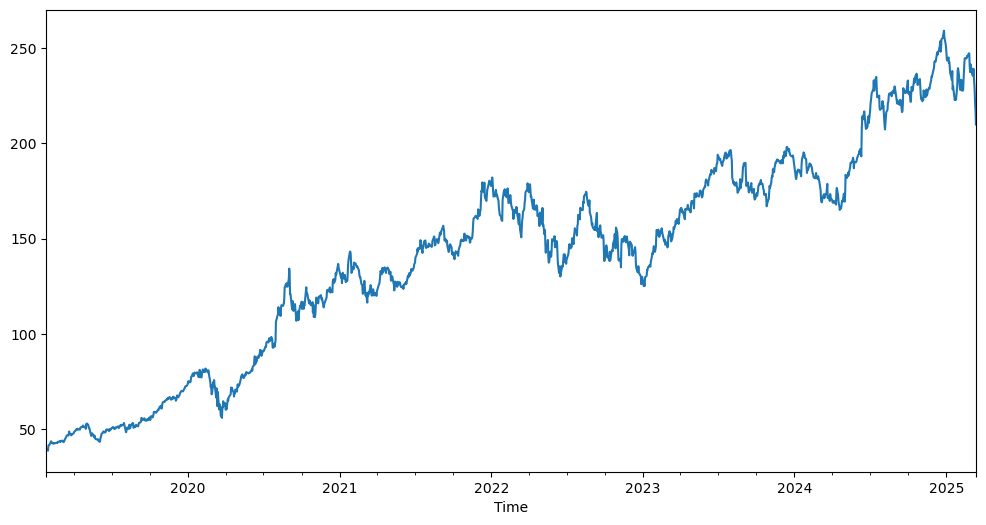

In [767]:
#pandas plot 
daily_close['Last'].plot(figsize=(12, 6))

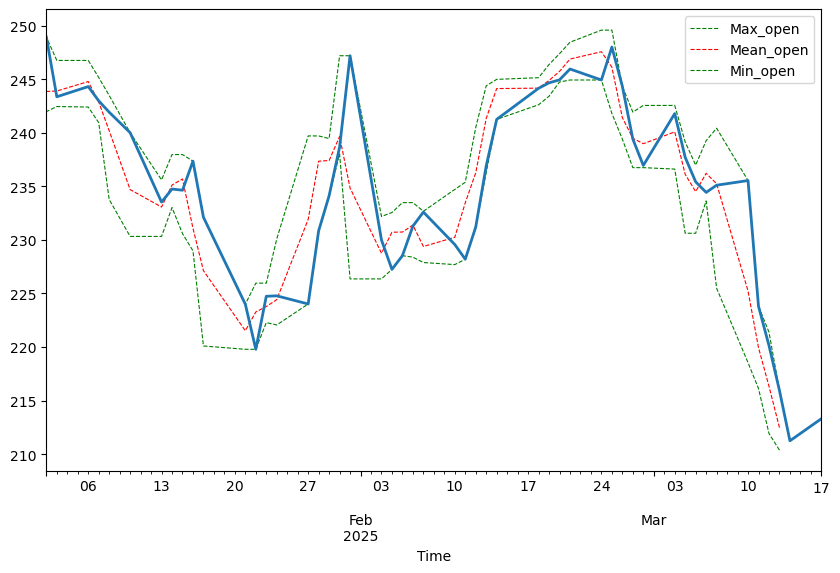

In [769]:
ax = daily_open[['Max_open', 'Mean_open', 'Min_open']].iloc[:50].plot(
figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8) 
daily_open['Open'].iloc[:50].plot(ax=ax, lw=2.0);

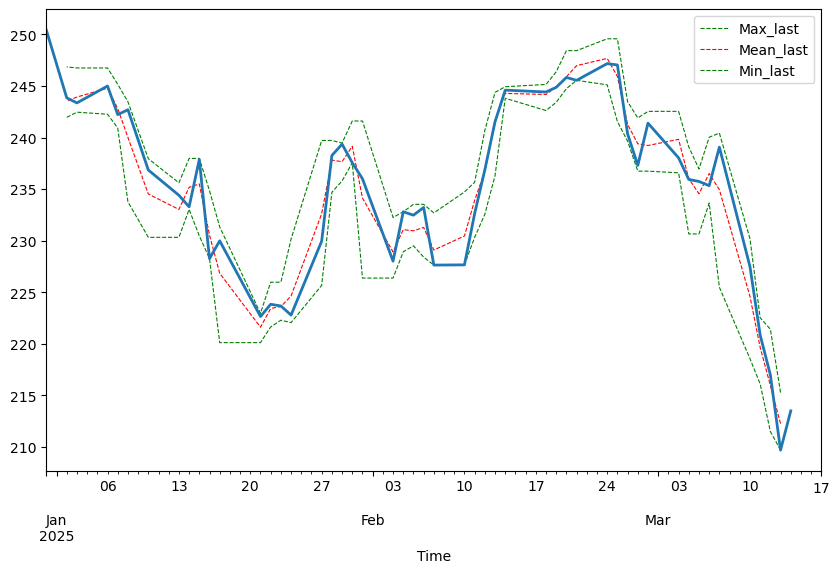

In [771]:
ax = daily_open[['Max_last', 'Mean_last', 'Min_last']].iloc[:50].plot(
figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8) 
daily_close['Last'].iloc[:50].plot(ax=ax, lw=2.0);

<Axes: xlabel='Time'>

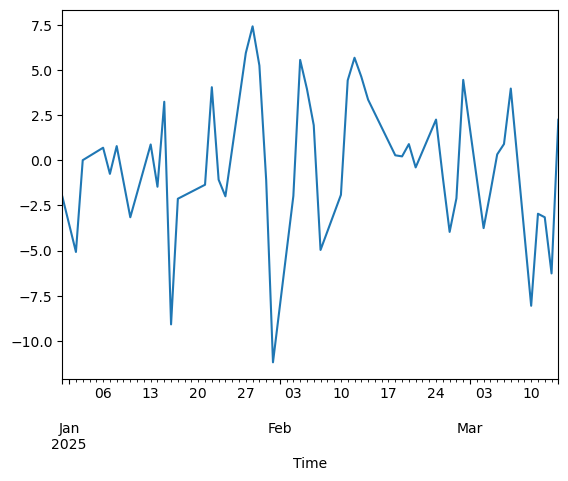

In [742]:
daily_return.iloc[:50].plot()

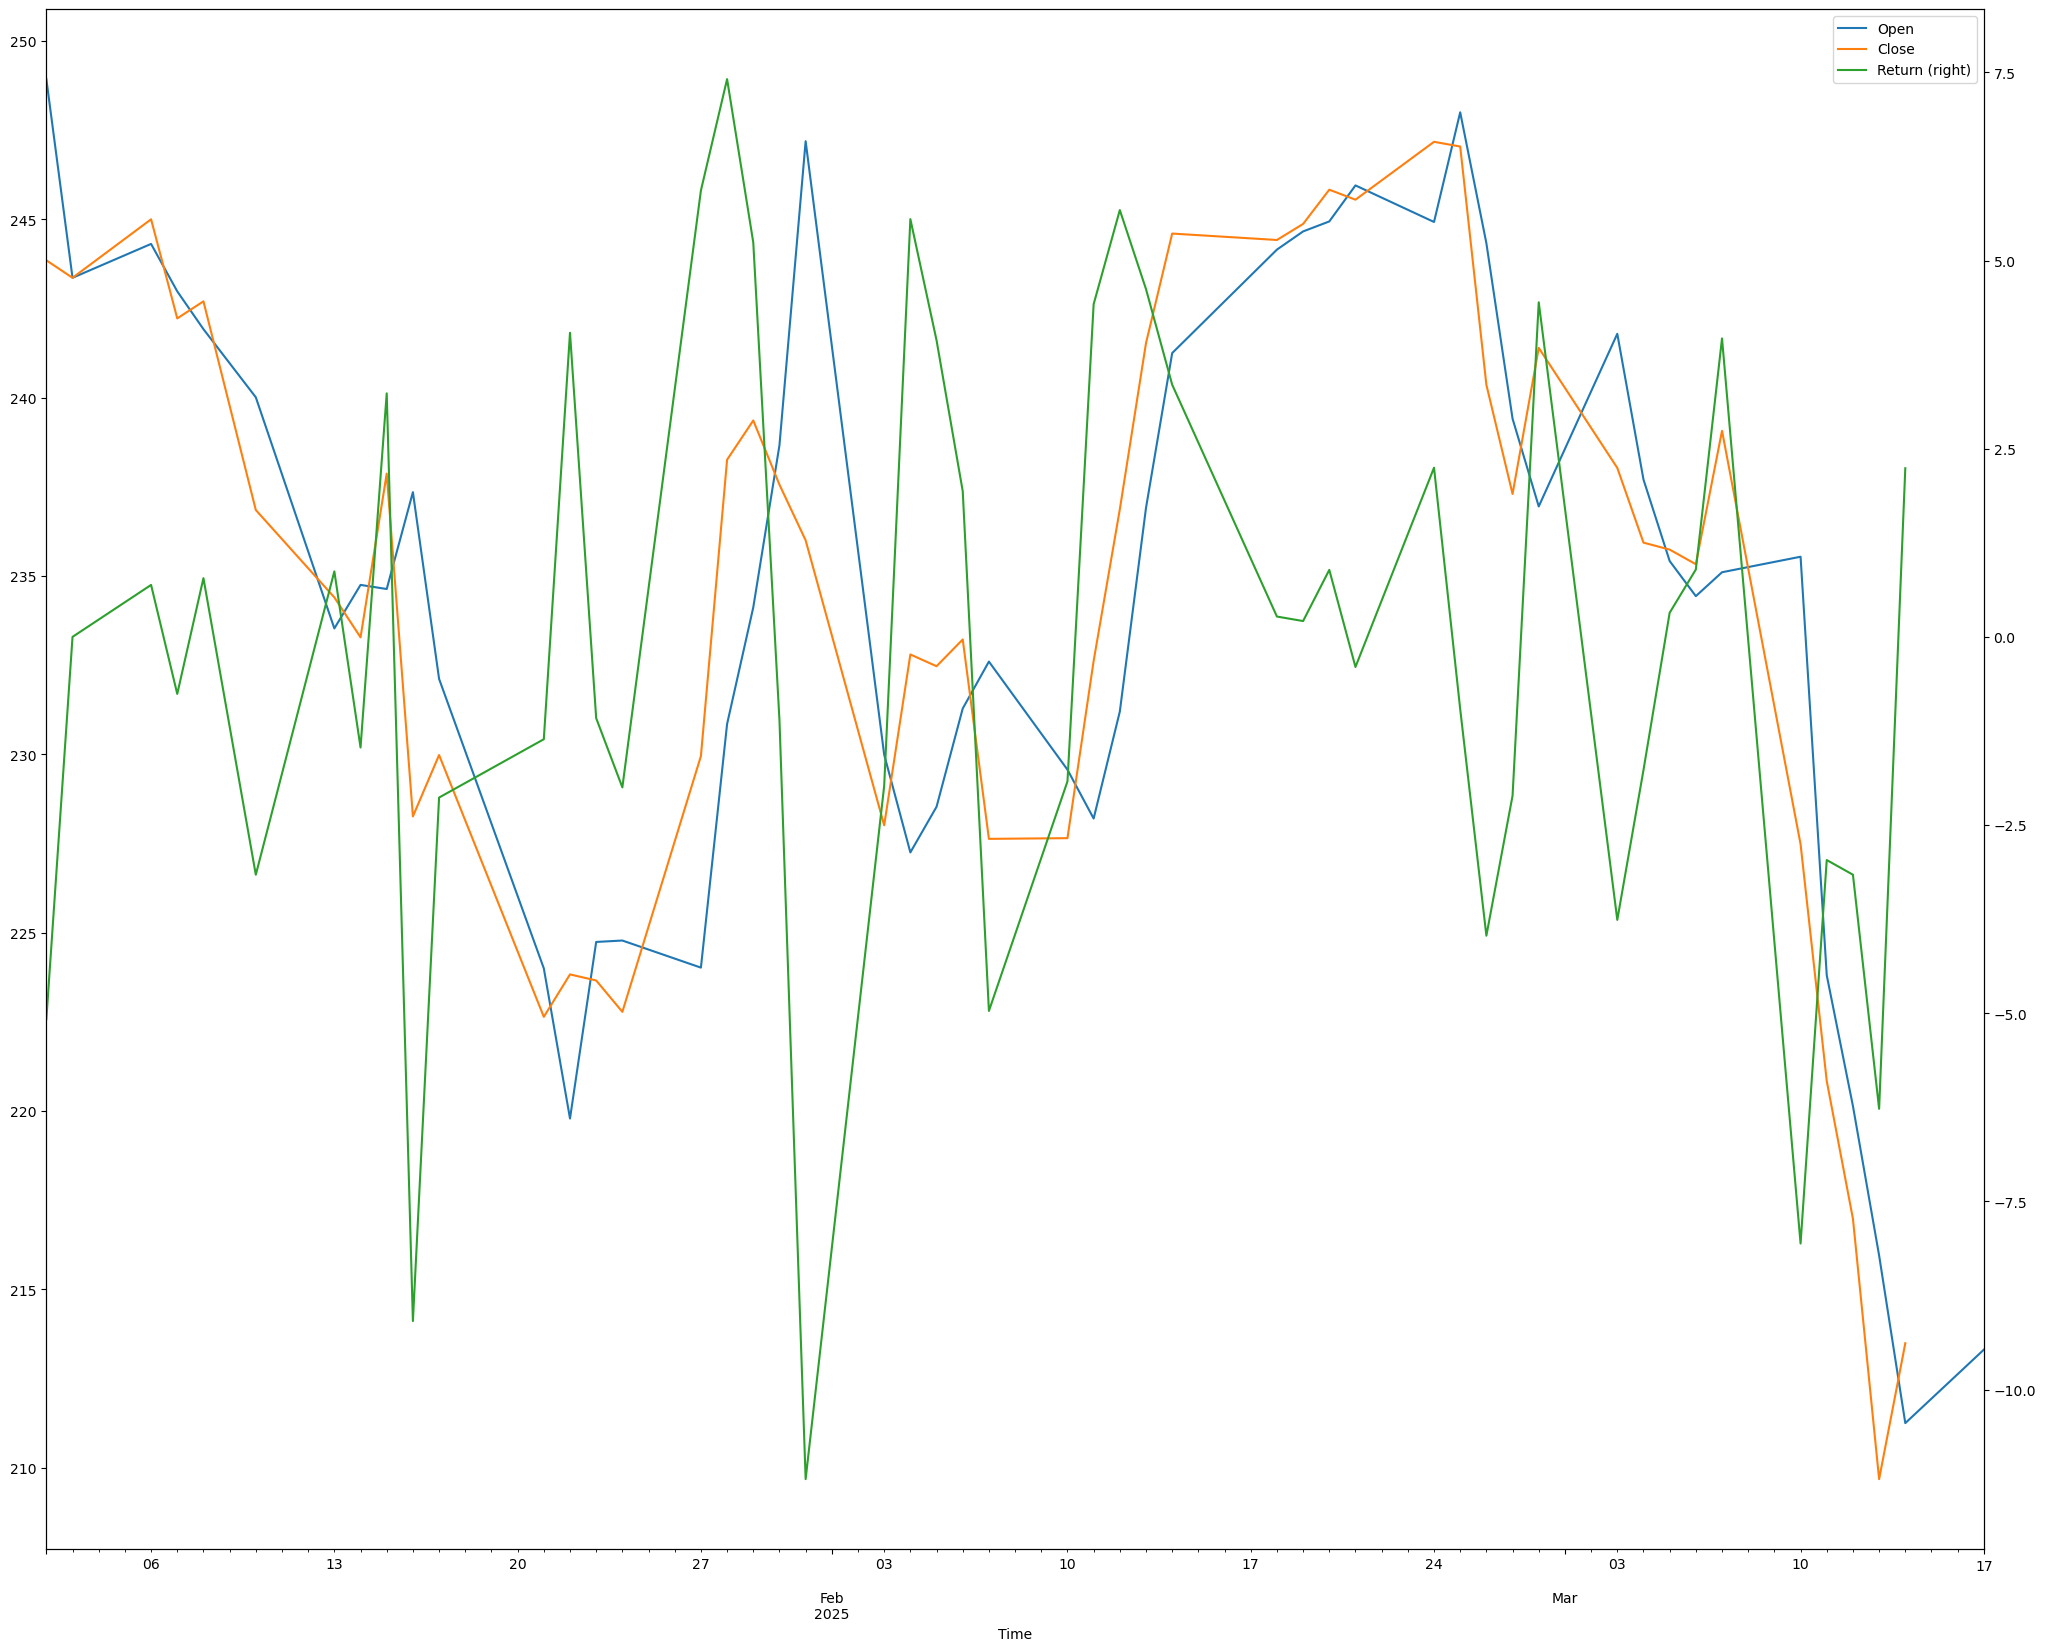

In [814]:
ax = daily_data[['Open','Close','Return']].iloc[:50].plot(figsize = (25,20), secondary_y ='Return')
ax.get_legend()

📝 Reflection on Exploring and Indexing a Stock Price Dataset with pandas
Working through this mini‑project gave me a much deeper, more intuitive understanding of how pandas handles time‑series financial data. I didn’t just run commands — I actually felt the mechanics of indexing, slicing, and aligning data, which is exactly the kind of fluency I need for quantitative research.

One of the biggest wins was learning how much work pandas can eliminate when I use the right parameters. Adding index_col=0 and parse_dates=True replaced six lines of manual datetime handling, and it reinforced how important it is to understand the tools instead of brute‑forcing everything. Seeing the DatetimeIndex behave correctly made .loc slicing, .between_time, and time‑based filtering feel natural instead of mysterious.

I also got hands‑on practice with Series operations and rolling computations. Creating rolling means, mins, and maxes helped me see how pandas aligns results by index, and assigning them back to the DataFrame showed me where view‑vs‑copy issues can appear. Running into SettingWithCopyWarning wasn’t a setback — it taught me why .copy() matters and how pandas protects me from silent bugs.

The most challenging part was aligning daily open and daily close prices to compute daily returns. My first attempt produced all NaNs, and debugging that forced me to understand how pandas aligns Series by index. Once I realized the timestamps didn’t match, the solution became obvious: reindex both Series to a shared integer index before subtracting. That moment really strengthened my intuition about how pandas thinks.

Plotting the data — both with matplotlib and pandas’ built‑in plotting — helped me visualize the structure of the dataset and confirm that my slicing and filtering were working as intended. Seeing the daily close series and the intraday OHLC slices made the data feel more “real” and connected the code to the underlying market behavior.

Overall, this project gave me confidence with:

DatetimeIndex behavior

.loc and .between_time

rolling operations

aligning Series for arithmetic

avoiding view‑vs‑copy pitfalls

plotting financial time‑series

I didn’t finish every stretch goal, but that’s a positive — I now have a clear set of learning objectives for the next mini‑project. The progress I made here is meaningful, and I can build on it with more advanced tasks like log returns, rolling volatility, and filtered subsets when I’m ready.